<a href="https://colab.research.google.com/github/askholani/PCVK_M_1/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


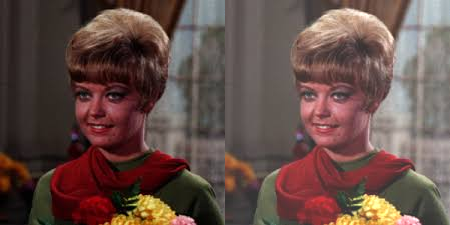

In [3]:
import cv2 as cv
import numpy as np

from google.colab.patches import cv2_imshow # image display

# Transformasi Linear Brightness
# formula : g(x,y)=f(x,y)+b
print("Mengubah tingkat kecerahan citra")
print("--------------------------------")

try:
  brightness = int(input("Masukkan nilai kecerahan: "))
except ValueError:
  print("Error, not a number")

original = cv.imread('/content/drive/MyDrive/content/famale.jpeg')
brightness_image = np.zeros(original.shape,original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness,0,255) # g(x,y)=f(x,y)+b
# np.clip(,mulai,akhir) : membatasi nilai hanya dari 0 - 255

# cara simpel tanpa for loop
# brigthness_image = cv.convertScaleAbu(original,beta=brightness)

final_frame = cv.hconcat((original,brightness_image))
# cv.hconcat() : menggabungkan gambar secara horizontal

cv2_imshow(final_frame)

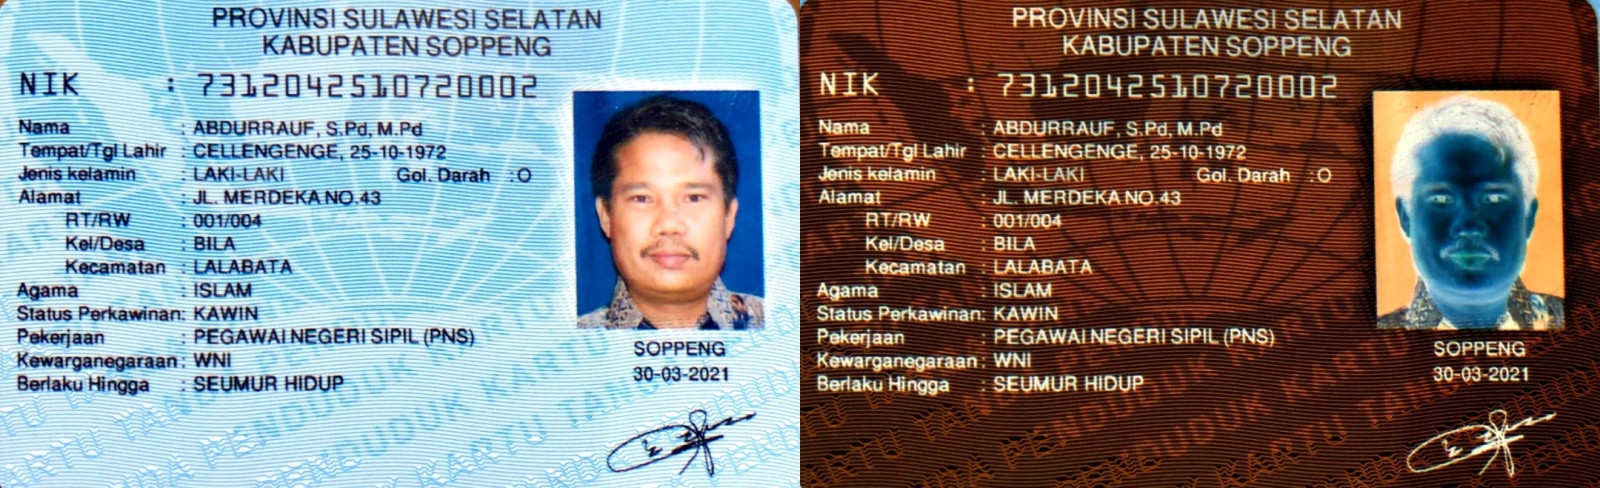

In [13]:
# TUGAS PRAKTIKUM
# 1.Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut
# 𝑔(𝑥)=255−𝑓(𝑥) , dimana g(x,y) adalah citra negative, dan f(x,y) adalah citra asli

import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow # image display

original = cv.imread('/content/drive/MyDrive/content/KTP.jpeg')
negative_image = 255 - original # 𝑔(𝑥)=255−𝑓(𝑥)

final_frame = cv.hconcat((original, negative_image))
cv2_imshow(final_frame)

Mengubah tingkat kontras dan tingkat kecerahan pada citra
--------------------------------
Masukkan nilai kecerahan (b) [-255 - 255]: 50
Masukkan nilai kontras (a) [biasanya antara 0.1 - 3.0]: 2


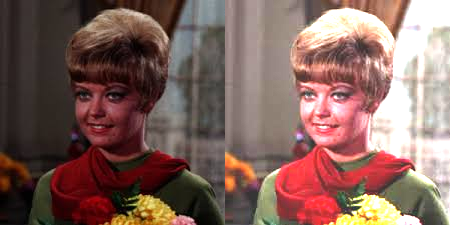

In [18]:
#2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:
# 𝑔(𝑥,𝑦)=𝑎∗ 𝑓(𝑥,𝑦)+𝑏 , dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, a adalah nilai contrast, dan b adalah nilai brightness.
import cv2 as cv
import numpy as np

from google.colab.patches import cv2_imshow # image display

# Transformasi Kontras
# formula: g(x, y) = a * f(x, y) + b
print("Mengubah tingkat kontras dan tingkat kecerahan pada citra")
print("--------------------------------")

try:
  brightness = int(input("Masukkan nilai kecerahan (b) [-255 - 255]: "))
  contrast = float(input("Masukkan nilai kontras (a) [biasanya antara 0.1 - 3.0]: "))
except ValueError:
  print("Error, not a valid number")

original = cv.imread('/content/drive/MyDrive/content/famale.jpeg')
contrast_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

Masukkan nilai kecerahan:50


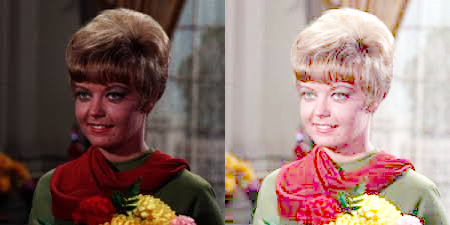

In [32]:
# 3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:
# 𝑠=𝑐∗ 𝑙𝑜𝑔(1+𝑟)
# dimana
# c : konstanta
# r : nilai grey-level citra input
# s : nilai grey-level citra output

import cv2 as cv
import numpy as np
import math

from google.colab.patches import cv2_imshow # image display

try:
  bvalue = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original3 = cv.imread('/content/drive/MyDrive/content/famale.jpeg')
brightness_image = np.zeros(original3.shape, original3.dtype)

for y in range(original3.shape[0]):
  for x in range(original3.shape[1]):
    for c in range(original3.shape[2]):
      brightness_image[y,x,c] = np.clip(bvalue*  (np.log(1 + original3[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original3, brightness_image))
cv2_imshow(final_frame)

a. Averaging


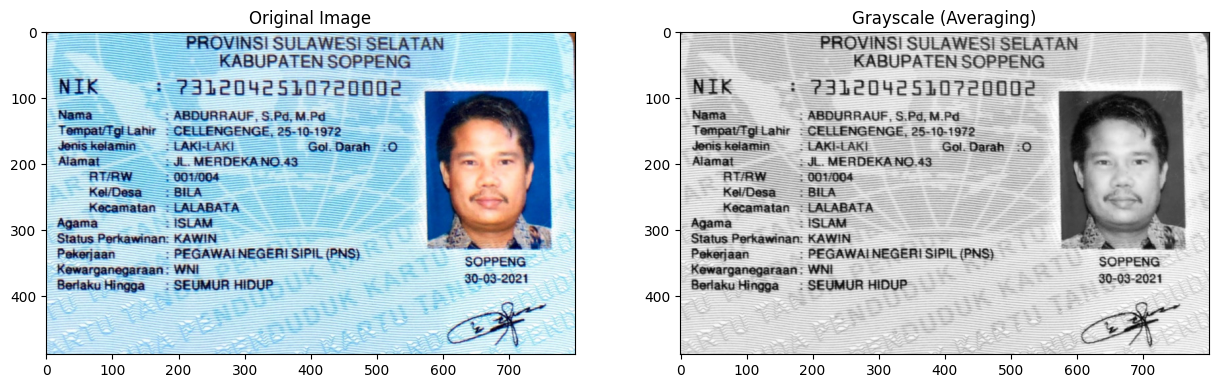

b. Lightness


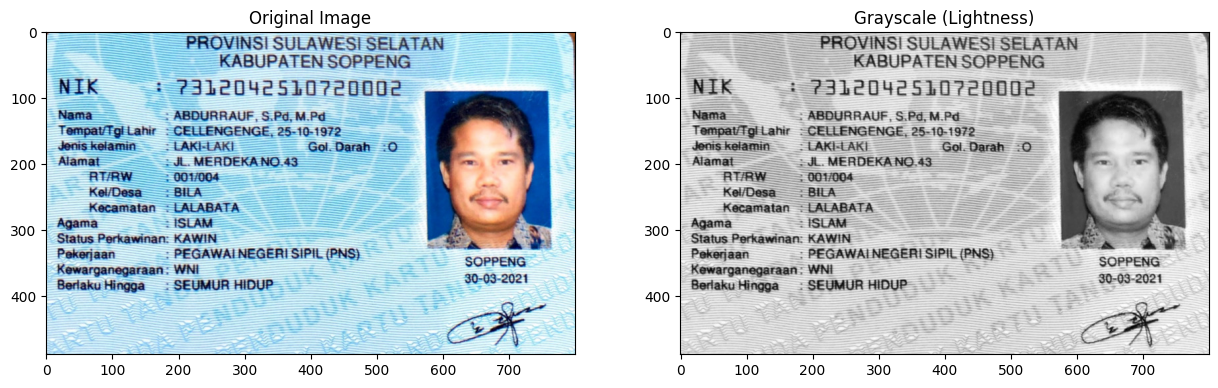

c. Luminance


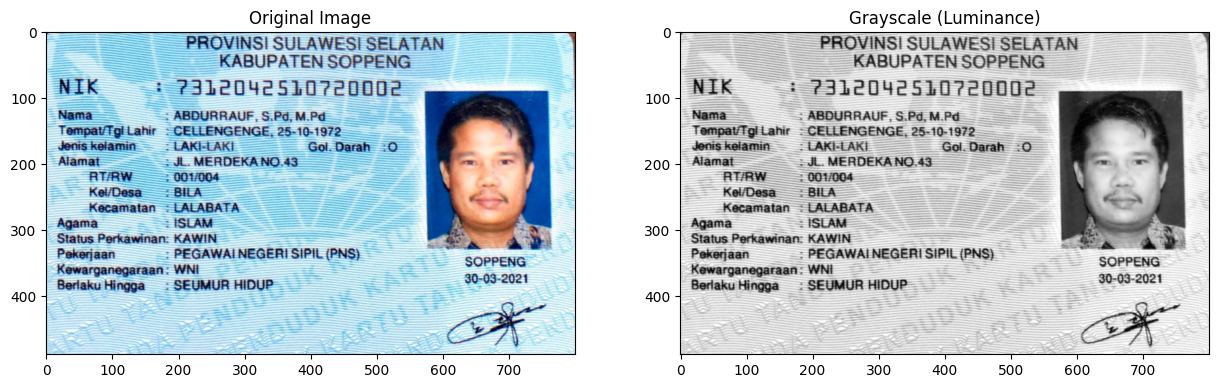

In [49]:
# 4.mplementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
# Rumus :
# 𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒𝑎𝑣𝑔=(𝑅+𝐺+𝐵)/3
# 𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒𝐿𝑖𝑔ℎ𝑡𝑛𝑒𝑠𝑠=(max[𝑅,𝐺,𝐵]+min[𝑅,𝐺,𝐵])/2
# 𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒𝐿𝑢𝑚𝑖𝑛𝑎𝑛𝑐𝑒=0.21𝑅+0.72𝐺+0.07𝐵

import cv2
import numpy as np
from matplotlib import pyplot as plt

base_image = cv2.imread('/content/drive/MyDrive/content/KTP.jpeg')

# Implementasi Grayscale menggunakan metode Averaging
average_image = np.zeros(base_image.shape[:2], dtype=np.uint8) # membuat citra kosong kosong dalam skala abu-abu dengan ukuran yang sama seperti citra asli (base_image)
# np.zeros () : NumPy yang digunakan untuk membuat array berukuran nol.
# base_image.shape[:2]: Ekspresi ini mengambil dua dimensi pertama dari bentuk (shape) dari base_image
# dtype=np.uint8 : argumen opsional yang menentukan tipe data yang akan digunakan untuk elemen-elemen dalam array. np.uint8 adalah tipe data yang sering digunakan untuk citra skala abu-abu, di mana setiap piksel diwakili oleh bilangan bulat 8-bit (0 hingga 255).


for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        avg = (red + green + blue) // 3
        average_image[y, x] = np.uint8(avg)

# Tampilkan gambar asli dan hasil transformasi grayscale
plt.figure(figsize=(15, 5))
print('a. Averaging')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(average_image, cmap='gray')
plt.title('Grayscale (Averaging)')

plt.show()

# Implementasi Grayscale menggunakan metode Lightness
lightness_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        lightness = (max(red, green, blue) + min(red, green, blue)) // 2
        lightness_image[y, x] = np.uint8(lightness)

plt.figure(figsize=(15, 5))

print('b. Lightness')
# Plot Lightness Transformation
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
im = plt.imshow(lightness_image, cmap='gray')
plt.title('Grayscale (Lightness)')

plt.show()

# Implementasi Grayscale menggunakan metode Luminance
luminance_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        luminance = 0.21 * red + 0.72 * green + 0.07 * blue
        luminance_image[y, x] = np.uint8(luminance)

plt.figure(figsize=(15, 5))

# Plot Luminance Transformation
print('c. Luminance')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(luminance_image, cmap='gray')
plt.title('Grayscale (Luminance)')

plt.show()

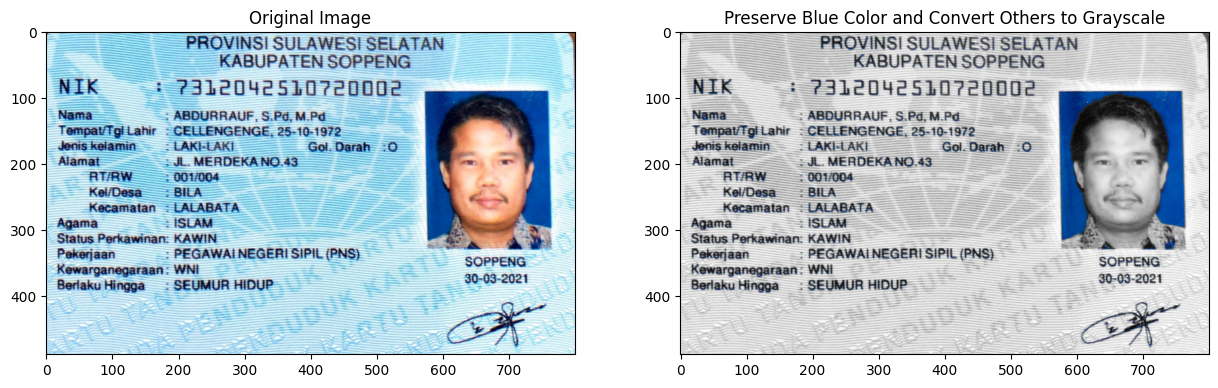

In [52]:
# 5.Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image
base_image = cv2.imread('/content/drive/MyDrive/content/KTP.jpeg')

# Define the lower and upper bounds for the blue color (in BGR)
lower_blue = np.array([100, 0, 0], dtype=np.uint8)
upper_blue = np.array([255, 100, 100], dtype=np.uint8)

# Create an empty result image
result_image = np.zeros_like(base_image)

# Iterate through each pixel in the image
for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        pixel = base_image[y, x]

        # Check if the pixel is within the blue color range
        if (pixel >= lower_blue).all() and (pixel <= upper_blue).all():
            result_image[y, x] = pixel  # Preserve blue color
        else:
            gray_value = np.mean(pixel)  # Convert to grayscale
            result_image[y, x] = [gray_value, gray_value, gray_value]

# Display the result
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Preserve Blue Color and Convert Others to Grayscale')

plt.show()